# STAT 201 Group 8 Final Project:
## Comparing the Mean Differences of Daily Step Count for Male vs Female University Students


- Jellia Ma
- Soyoung Jeong
- Nika Karimi Seffat
- Zachary Ferguson

### Introduction:

A post-pandemic world has brought about detrimental mental health issues and enhanced sedentary behavior; however, physical exercise, like walking, alleviates anxiety and increases energy levels (Sharma, 2006). An accessible and measurable tool to calculate step counts is with our phones; almost all phones embed the ‘Health’ application, which tracks one’s daily steps. With men and women exhibiting different leisure habits, we were interested in studying if a discrepancy existed in their walking behaviors. Men tend to be more active than women, due to social factors, (Azevedo, 2007), however, we wanted to examine this specifically on university students.

Our dataset will be comprised of the raw daily step counts of 5 female and 5 male students, dispersed over 2 weeks. The dataset will be organized into an excel sheet, with our variable of interest being daily step counts, spread across 2 categories of gender (male/female). The location parameter of interest is the difference in mean step counts between genders, and we will calculate the standard deviation to understand the sampling variation.

##### **Research Question**: Is there a difference between the mean daily step count of men ($\mu_m$) vs women ($\mu_w$)?
##### Null Hypothesis: $\mu_m - \mu_w$ = 0
##### Alternative Hypothesis: $\mu_m - \mu_w$ ≠ 0

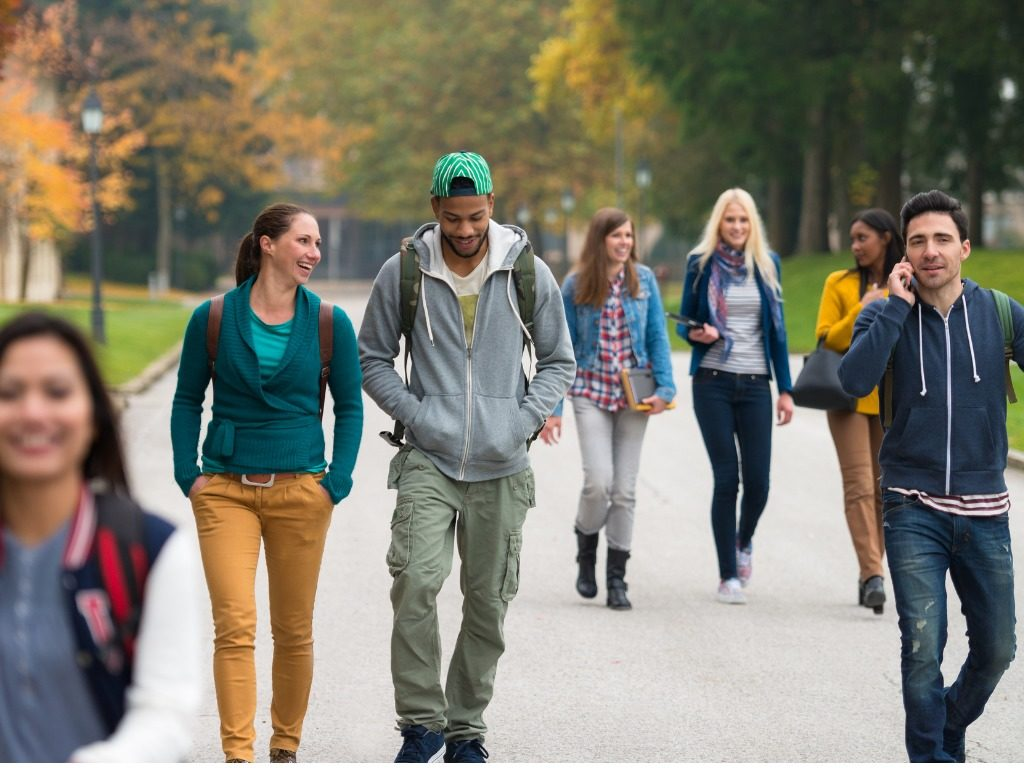
<div style="text-align: center"><i>Image from <a href="https://www.higheredtoday.org/wp-content/uploads/2019/04/Students-walking-on-campus.jpg">higheredtoday.com</i></a></div>
<br>



### Preliminary Results




In [1]:
#inserting the necessary libraries
library(cowplot)
library(dplyr)
library(gridExtra)
library(tidyverse)
library(repr)
library(infer)
library(repr)
library(broom)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()


#### Data Reading & Tidying

In [2]:
stepcount_data <- read_csv("https://raw.githubusercontent.com/Jellia1225/STAT201-Group-8-Foot-Step-Project/87d7bed3c70f2afb2cc10c14a852019310c33208/STAT201%20Dataset%20for%20Foot%20Steps%20Group%208.csv")
head(stepcount_data)

stepcount <- stepcount_data %>%
             select(Gender:Steps_3.12)
# We skipped the "Name" column.

colnames(stepcount) <- c("gender", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14")
# We renamed the steps for each day to (1-14)

stepcount <- stepcount %>%
             pivot_longer(!gender, names_to = "day", values_to = "stepcount")
# We organized the table into gender, day, and counts.

head(stepcount)

Rows: 10 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Name, Gender
dbl (14): Steps_2.27, Steps_2.28, Steps_3.1, Steps_3.2, Steps_3.3, Steps_3.4...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name,Gender,Steps_2.27,Steps_2.28,Steps_3.1,Steps_3.2,Steps_3.3,Steps_3.4,Steps_3.5,Steps_3.6,Steps_3.7,Steps_3.8,Steps_3.9,Steps_3.10,Steps_3.11,Steps_3.12
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Gabriella,F,10536,8684,6633,5526,2842,10923,7124,10229,8537,7699,7116,8226,5665,5492
Yoki,F,6378,2431,5212,6232,2241,7334,1332,11720,4775,9025,8127,3411,3004,5302
Mary,F,9648,8035,9436,13271,7118,3449,5254,8633,8845,8305,6584,13099,19000,10312
Ars,M,10337,1545,9631,5877,6189,8576,5552,7716,8174,9732,5736,9312,6850,2320
Anna,F,4472,6361,1443,3842,2362,1075,180,2250,6787,1208,4178,1292,297,252
Alex,M,2269,3779,7078,4584,4217,10310,8672,8802,10217,6578,6759,9503,7343,8465


gender,day,stepcount
<chr>,<chr>,<dbl>
F,1,10536
F,2,8684
F,3,6633
F,4,5526
F,5,2842
F,6,10923


### Obtaining Estimates

In [11]:
#Calculating mean step count for each gender
stepcount_estimates <- stepcount %>%
                       group_by(gender) %>%
                       summarise(mean_stepcount = mean(stepcount))

stepcount_estimates

gender,mean_stepcount
<chr>,<dbl>
F,7198.314
M,7330.414


We calculated the daily mean of stepcount between genders. For female, the mean is 7198.314. For male, the mean is 7330.414; these values are very close together.

### Data Plotting

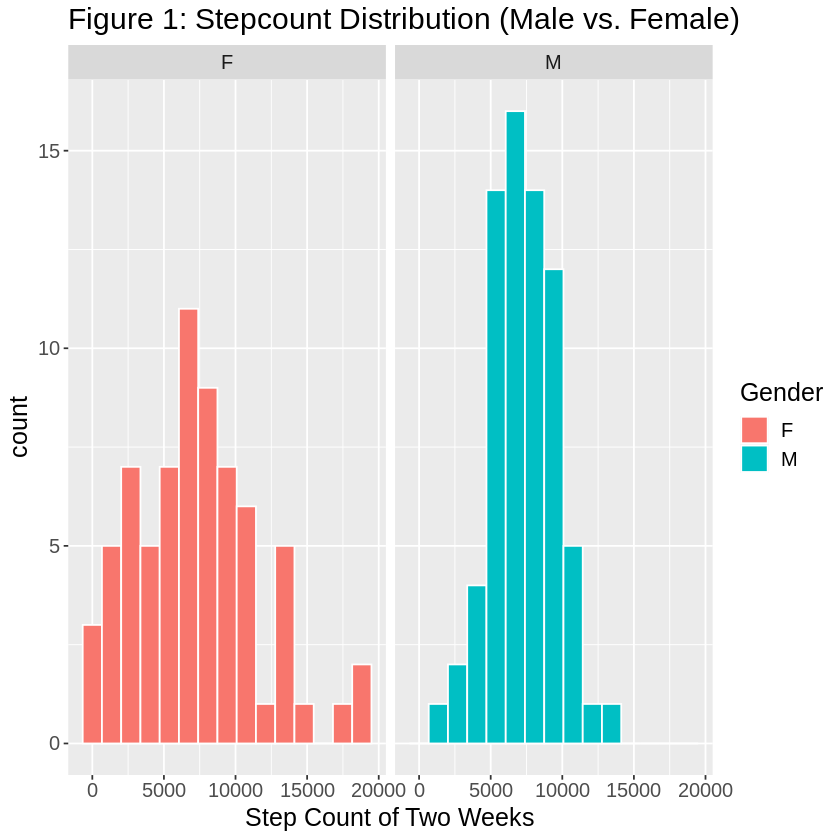

In [20]:
options(repr.plot.width = 7, repr.plot.height = 7)

stepcount_plot_dist <- stepcount %>%
                       ggplot() + 
                       geom_histogram(aes(stepcount, fill=gender), color = 'white', bins = 15) + 
                       facet_wrap(~gender, scales = "fixed") +
                       labs(x = "Step Count of Two Weeks", fill = "Gender") +
                       ggtitle("Figure 1: Stepcount Distribution (Male vs. Female)")+
                       theme(text = element_text(size = 15))

stepcount_plot_dist

The step count distributions are approximately symmetrical and resemble the normal distribution. They are both centered around 7000.

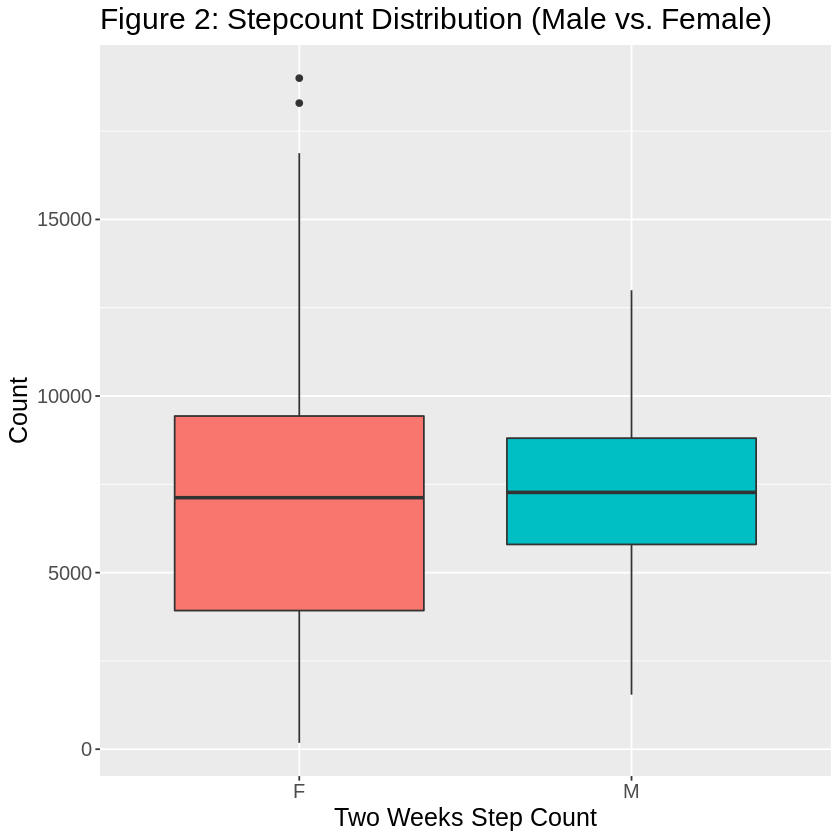

In [21]:
stepcount_plot_box <- stepcount %>%
                      ggplot() +
                      geom_boxplot(aes(x = gender, stepcount, fill = gender)) +
                      ggtitle("Figure 2: Stepcount Distribution (Male vs. Female)") + 
                      xlab("Two Weeks Step Count") + 
                      ylab("Count") + 
                      guides(fill = "none")+
                      theme(text = element_text(size = 15))

stepcount_plot_box

We can tell from this boxplot that the means of the daily step count are very close to each other; and females seem to have a greater variance.

### T.test

In [6]:
#isolating vector of only male participants
stepcount_male <- stepcount %>%
    filter(gender == "M") %>%
    select(stepcount)

#isolating vector of only female participants
stepcount_female <- stepcount %>%
    filter(gender == "F") %>%
    select(stepcount)

#t.test comparing both vectors
t_test <- tidy(
   t.test(x = stepcount_female,
         y = stepcount_male,
         alternative = "two.sided"))
t_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-132.1,7198.314,7330.414,-0.227738,0.8202914,105.349,-1282.193,1017.993,Welch Two Sample t-test,two.sided


As can be seen, the p value for our t test is 0.820291365557718; this suggests we have little reason to doubt the null hypothesis.

### Bootstrapping

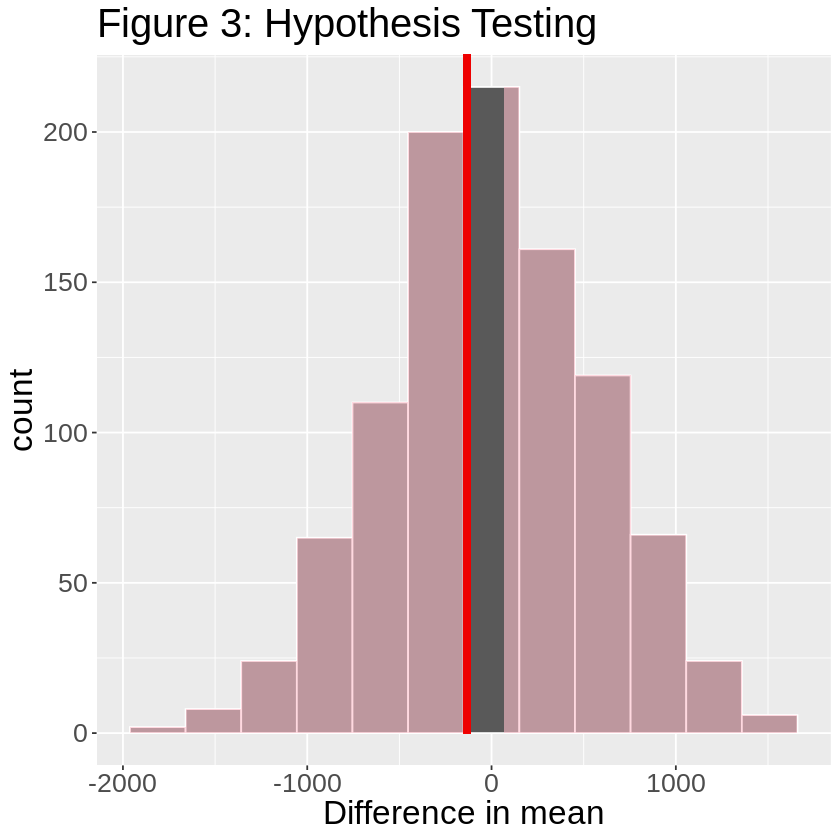

In [22]:
set.seed(2106)

people_count <-
    stepcount %>% 
    count(gender)

#obtaining test statistic
obs_diff_in_means <- 
    stepcount  %>% 
    specify(formula = stepcount ~ gender) %>%
    calculate(stat = "diff in means", order = c("F", "M"))

#obtaining null distribution (test statistic under null hypothesis)
null_obs_diff_in_means <- 
    stepcount  %>% 
    specify(formula = stepcount ~ gender) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("F", "M"))

#plotting hypothesis test results
diff_in_means_plot <-
    visualize(null_obs_diff_in_means, bins = 12) + 
    shade_p_value(obs_stat = obs_diff_in_means, direction = "both") +
    xlab("Difference in mean") +
    ggtitle("Figure 3: Hypothesis Testing") +
    theme(text = element_text(size = 20))

diff_in_means_plot

The majority of the plot is shaded, indicating that the difference in means between the two groups is not statistically significant; these values are consistent with the null hypothesis.

In [8]:
#obtaining p value
p_value <-
    null_obs_diff_in_means %>% 
    get_p_value(obs_stat =  obs_diff_in_means, direction = "both")

p_value$p_value[1]

[1] 0.85

This p value is very close to the p value obtained through our t.test.
Given a p-value greater than .05 we do not reject the null hypothesis at the 5% significance level.

In [9]:
#obtaining confidence interval
diff_in_means_ci <- null_obs_diff_in_means %>%
    get_ci(.95)

diff_in_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
-1120.155,1097.553


The 95% confidence interval for the difference in mean stepcount between males and females is -1120.155 to 1097.553.

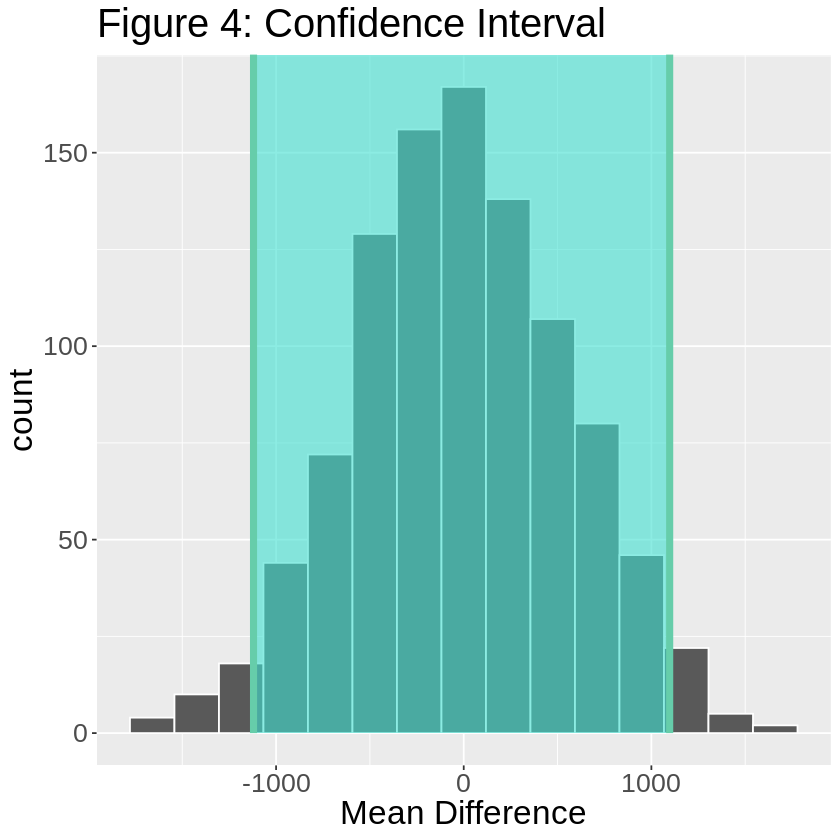

In [27]:
diff_in_means_ci_plot <- null_obs_diff_in_means %>%
    visualize() +
    shade_confidence_interval(diff_in_means_ci) +
    ggtitle("Figure 4: Confidence Interval") +
    xlab("Mean Difference") +
    theme(text = element_text(size = 20))
    
diff_in_means_ci_plot

We are 95% confident that the true mean difference between stepcount in males and females is between -1120.155 and 1097.553. 

### Methods & Plan




Our sample population is technologically reliant; they carry their phones with them frequently, and these devices are advanced enough to record step data accurately. There is consistency among our samples, as every data point is recorded from an iPhone, and it was collected at the same time intervals, minimizing the effect of macro influences.

However, there are limitations; our sample is made of our group members, and our friends; we chose a sample out of convenience (this arose from a limited reach to certain people & needing private data). To address this, we chose people that studied different majors, and varied habits, to make our sample somewhat generalizable/representative. It is unrealistic to take data from 140 people; we took 14 observations from 10 people, however, we are assuming a sample size of n = 140, like we were taking data from 140 people.   

We attempted to mimic UBC’s student gender distribution of 51% female and 49% male students (Sadiq & Averill, 2023) by creating a 50/50 distribution across these categories. We will compute a 95% confidence interval, in addition to a simulated bootstrapping and asymptotic hypothesis test; we have tried to minimize our limitations and therefore assume that we satisfy CLT conditions.

Backed by scientific studies, we expect to find that male university students will have a higher average step count. If our findings show that gender roles are statistically significant in walking habits, it can create a further impact on transportation planning or create gender equity initiatives that encourage exercise. We could ask, are these differences attributed to social pressures, leisure preferences, or physiological factors? Even without statistically significant findings, we could instead focus on other variables - eg. how does one’s major & proximity to classes affect walking habits? 


**Proposal Total Word Count: 499**

### References


Azevedo, M. R., Araújo, C. L., Reichert, F. F., Siqueira, F. V., da Silva, M. C., &amp; Hallal, P. C. (2007). Gender differences in leisure-time physical activity. *International Journal of Public Health*, 52(1), 8–15. https://doi.org/10.1007/s00038-006-5062-1 


Sadiq, R., &amp; Averill, G. (2023). (rep.). *University of British Columbia Annual Enrolment Report 2022/23* (p. 35). University of British Columbia. 

Sharma, A. (2006). Exercise for mental health. *The Primary Care Companion For CNS Disorders*, 8(2). https://doi.org/10.4088/pcc.v08n0208a